# CNN implementation on Dementia Dataset

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import cv2 as cv
import os, sys

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
path1='/drive/MyDrive/CAO_project (DB)/NonDemented'
path2='/drive/MyDrive/CAO_project (DB)/MildDemented'
path3='/drive/MyDrive/CAO_project (DB)/ModerateDemented'
files1=os.listdir(path1)
files2=os.listdir(path2)
files3=os.listdir(path3)
Num_files_N=len(files1)
Num_files_MD=len(files2)
Num_files_D=len(files3)
dataset_len=Num_files_N+Num_files_MD+Num_files_D

In [ ]:
len(files3)


52

# Dataset Creation

For every file

1. Read the image
2. Convert it to grayscale (Optional)
3. Resize to (100,100)
4. Preprocessing: Normalization
5. Reshape to (100,100,1)
6. Create the dataset

In [ ]:
data=np.zeros((dataset_len,100,100,1))
label=[]
data.shape    #(253,100,100,1)253-->NO.OF IMAGES, 1-->FOR B/W IMAGES {3-->COLOR (RGB)}

(263, 100, 100, 1)

In [ ]:
for i in range(Num_files_N):
    name=path1+'/'+files1[i]
    img=cv.imread(name)
    img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    img_gs=cv.resize(img_gs,(100,100))
    img_gs=img_gs/255
    img_gs=img_gs.reshape(100,100,1)
    data[i,:,:]=img_gs
    label.append('Normal')


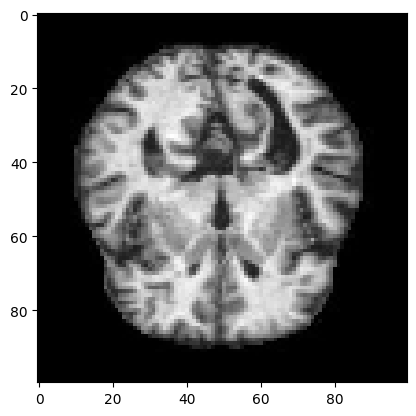

In [ ]:
plt.imshow(data[99],cmap='gray')

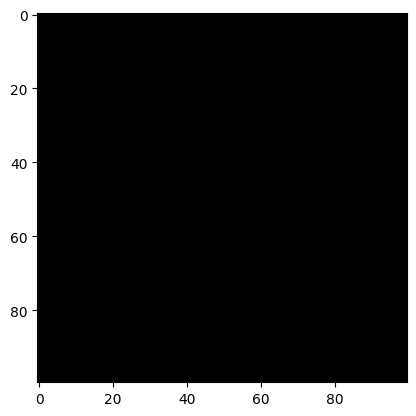

In [ ]:
plt.imshow(data[100],cmap='gray')

In [ ]:
for i in range(Num_files_MD):
    name=path2+'/'+files2[i]
    img=cv.imread(name)
    img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    img_gs=cv.resize(img_gs,(100,100))
    img_gs=img_gs/255
    img_gs=img_gs.reshape(100,100,1)
    data[i+Num_files_N,:,:]=img_gs
    label.append('Mild Dementia')

In [ ]:
for i in range(Num_files_D):
    name=path3+'/'+files3[i]
    img=cv.imread(name)
    img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    img_gs=cv.resize(img_gs,(100,100))
    img_gs=img_gs/255
    img_gs=img_gs.reshape(100,100,1)
    data[i+Num_files_N+Num_files_MD,:,:]=img_gs
    label.append('Dementia')


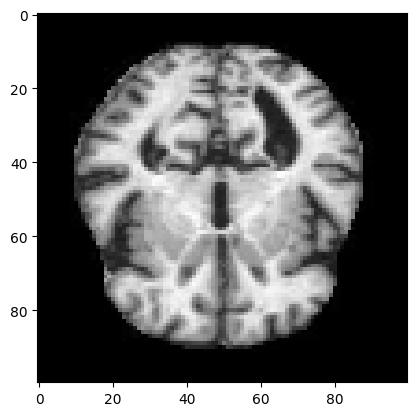

In [ ]:
plt.imshow(data[100],cmap='gray')

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lab=le.fit_transform(label)

In [ ]:
label

['Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',

In [ ]:
lab

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Train and test dataset spilt

In [ ]:
train_images,test_images,train_labels,test_labels=train_test_split(data,lab,test_size=0.3,random_state=1)  #20% for testing 0.2, 30% for testing 0.3

In [ ]:
print('Train Dataset Size:',np.size(train_labels))
print('Test Dataset Size:',np.size(test_labels))

Train Dataset Size: 184
Test Dataset Size: 79


# Define the CNN architecture

Create the convolutional base

1. Convolutional : 32 filters 3x3
2. Maxpooling: 2x2
3. Convolutional : 64 filters 5x5
4. Convolutional : 32 filters 3x3
5. Maxpooling: 3x3

note: no. of convolution layers is a hit and trial method. add and check where accuracy increases


In [ ]:
network=models.Sequential()
network.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(100,100,1))) #32 layers(filters) 3*3 matrix relu=only +ve side of graph...reduced our image sizes to 100,100
network.add(layers.MaxPooling2D((2,2)))  #o/p of convoltion to maxpooling
network.add(layers.Conv2D(64,(7,7),activation='relu'))  #7*7-->complexity reduces
network.add(layers.Conv2D(32,(4,4),activation='relu'))
network.add(layers.Conv2D(16,(3,3),activation='relu'))
network.add(layers.MaxPooling2D((3,3)))

Check summary of convolutional base

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 43, 43, 64)        100416    
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 32)        32800     
                                                                 
 conv2d_3 (Conv2D)           (None, 38, 38, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                    

Build the classifier on top of the convolutional base

In [ ]:
network.add(layers.Flatten())
network.add(layers.Dense(80,activation='relu'))
network.add(layers.Dense(50,activation='relu'))
network.add(layers.Dense(30,activation='relu'))
network.add(layers.Dense(3,activation='softmax'))   #3 datasets

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 43, 43, 64)        100416    
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 32)        32800     
                                                                 
 conv2d_3 (Conv2D)           (None, 38, 38, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                    

Compile and train the model

In [ ]:
network.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
test_labels

array([2, 2, 1, 1, 2, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 2,
       2, 1, 0, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0])

In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
trained_network=network.fit(train_images,train_labels,epochs=300,validation_data=(test_images,test_labels))

Epoch 1/100
6/6 [==============================] - 16s 2s/step - loss: 1.0846 - accuracy: 0.4348 - val_loss: 1.0816 - val_accuracy: 0.3924
Epoch 2/100
6/6 [==============================] - 14s 2s/step - loss: 1.0724 - accuracy: 0.4348 - val_loss: 1.0740 - val_accuracy: 0.3924
Epoch 3/100
6/6 [==============================] - 11s 2s/step - loss: 1.0644 - accuracy: 0.4348 - val_loss: 1.0660 - val_accuracy: 0.3924
Epoch 4/100
6/6 [==============================] - 12s 2s/step - loss: 1.0583 - accuracy: 0.4348 - val_loss: 1.0593 - val_accuracy: 0.3924
Epoch 5/100
6/6 [==============================] - 13s 2s/step - loss: 1.0502 - accuracy: 0.4348 - val_loss: 1.0553 - val_accuracy: 0.3924
Epoch 6/100
6/6 [==============================] - 13s 2s/step - loss: 1.0451 - accuracy: 0.4348 - val_loss: 1.0491 - val_accuracy: 0.3924
Epoch 7/100
6/6 [==============================] - 13s 2s/step - loss: 1.0414 - accuracy: 0.4348 - val_loss: 1.0422 - val_accuracy: 0.3924
Epoch 8/100
6/6 [==========

In [ ]:
train_labels.shape

(184,)

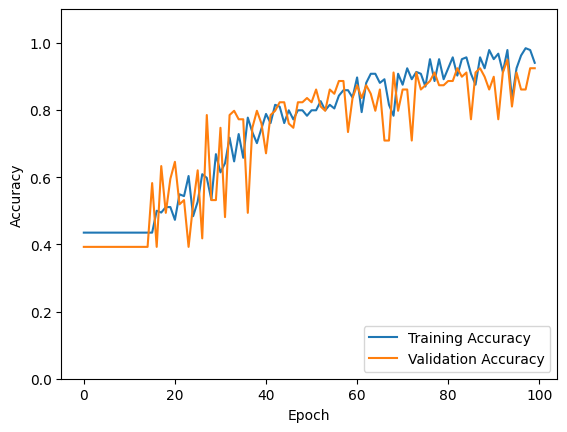

In [ ]:
plt.plot(trained_network.history['accuracy'],label='Training Accuracy')
plt.plot(trained_network.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1.1])
plt.legend(loc='lower right')

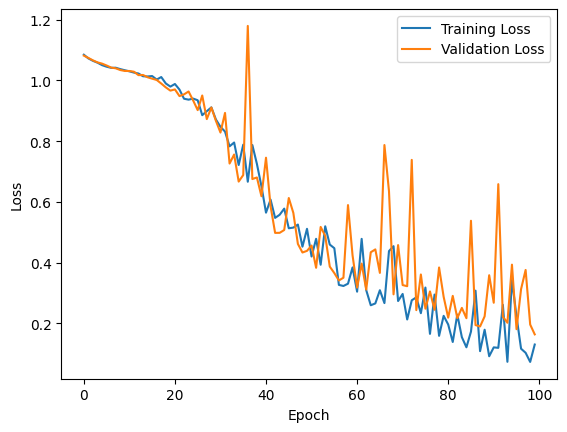

In [ ]:
plt.plot(trained_network.history['loss'],label='Training Loss')
plt.plot(trained_network.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

3/3 [==============================] - 2s 465ms/step - loss: 0.1642 - accuracy: 0.9241
Test Accuracy: 0.9240506291389465


Evaluate the network

In [ ]:
network.save("dementia.h5")

In [ ]:
loaded_model = models.load_model("dementia.h5")

In [ ]:
input_image = cv.imread("/26 (25).jpg")
input_image_gs = cv.cvtColor(input_image, cv.COLOR_RGB2GRAY)
input_image_gs = cv.resize(input_image_gs, (100, 100))
input_image_gs = input_image_gs / 255
input_image_gs = input_image_gs.reshape(1, 100, 100, 1)  # Reshape for model input

In [ ]:
prediction = loaded_model.predict(input_image_gs)
predicted_class = np.argmax(prediction)
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 36ms/step
Predicted Class: 0


In [ ]:
# Define class names
class_names = ['Demented', 'Mild Demented', 'Non Demented']

# Make prediction
prediction = loaded_model.predict(input_image_gs)
predicted_class_index = np.argmax(prediction)
predicted_class_name = class_names[predicted_class_index]
print("Predicted Class:", predicted_class_index, "-", predicted_class_name)


1/1 [==============================] - 0s 50ms/step
Predicted Class: 0 - Demented
